In [8]:
import pandas as pd
df=pd.read_csv('C:/Users/user/Desktop/stock_prediction/question4-stock-data.csv')
df['Date']=pd.to_datetime(df['Date'])
df=df.sort_values('Date')

Matplotlib is building the font cache; this may take a moment.


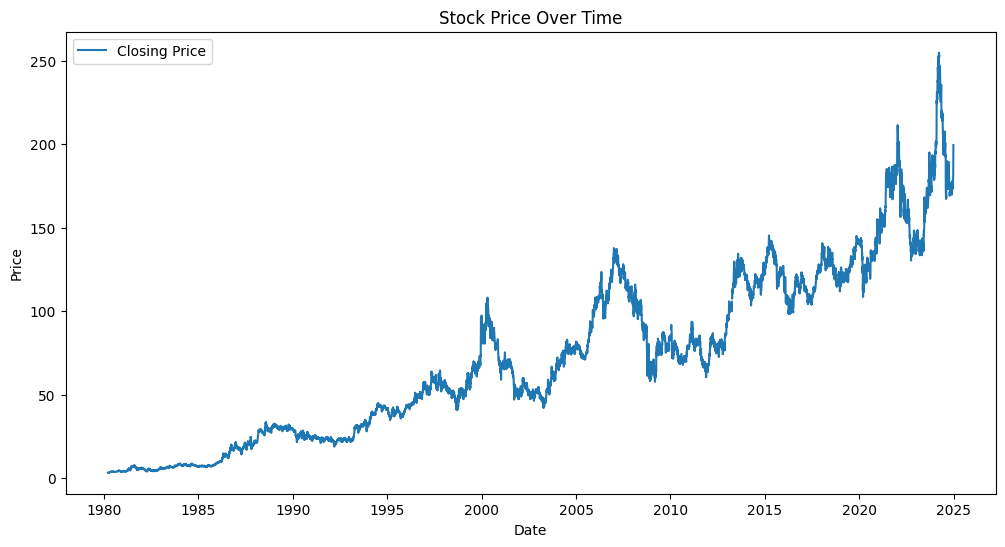

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.savefig('closing_price.png')  # Save the plot
plt.show()

In [13]:
print(df.isnull().sum())  # Check missing values
df = df.ffill()  # Forward-fill missing data

Unnamed: 0    0
Date          0
Adj Close     0
Close         0
High          0
Low           0
Open          0
Volume        0
dtype: int64


In [14]:
# 7-day moving average
df['MA7'] = df['Close'].rolling(window=7).mean()

# RSI (Relative Strength Index)
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

In [15]:
df.to_csv('processed_stock_data.csv', index=False)  # Save for modeling